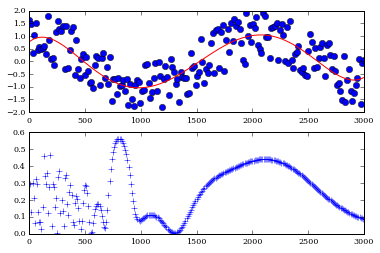

[0.51511664305112315, 0.2009694122358634, 0.18106071380768551, 0, 0.54304942278782908, 0.32583009861810114, 0.11207720501189045, 0.13098164911429944, 0.23814554472950927, 0.32108689317136774, 0.57721849628671862, 0.53974365314931561, 0, 0.66779751727999115, 0.2686346367080939, 0.83679744616696938, 0.055831072421856309, 0.54963565276542314, 0.47193409657657881, 0.44162811337882069, 0.35387533828863937, 0.75916630798164397, 0.35596110580463536, 0.31689104112480865, 0, 0.76088155728353946, 0.61782294599698628, 0.63988451402854007, 0.5204466389031932, 0.45893041492085629, 0.70231137731844973, 0, 0.12995427605962512, 0.25446639206501048, 0.13182738762625323, 0, 0.61552889474396189, 0.23927077708379035, 0.3872152872353094, 0, 0.26080535227938578, 0.19510889398998521, 0.41572139684704135, 0.43202160068280637, 0.56890192761523928, 0, 0.04064061088026627, 0, 0.47376946271009007, 0.53192613549781365, 0, 0, 0.32540303805383752, 0.16189414066275926, 0, 0, 0.17884834982622427, 0, 0.0421031484997836

In [26]:
%matplotlib inline
#code goes here
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.time_series import\
    lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap
from scipy.interpolate import interp1d


#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Generate Data

x = np.linspace(0, 3000, num=200, endpoint=True)
y = np.cos(x*0.003)
for i in range(len(y)):
    r = np.random.random()
    if r < 0.5:
        y[i] -= np.random.random()
    else:
        y[i] += np.random.random()

period = np.array([i for i in range(10,3000,10)])
omega = 2 * np.pi / period
yerr = [np.random.random()/2 for i in y]

PS = lomb_scargle(x, y, yerr, omega, generalized=True)

p = np.poly1d(np.polyfit(x,y,5))
xp = np.arange(0,3000,1)

#calculate y difference
dy = []
for i in range(len(y)):
    dy.append(abs(y[i]-p(x[i])))
    if dy[i] < yerr[i]:
        dy[i] = 0
    else:
        dy[i] -= yerr[i]

plt.subplot(211)
plt.plot(x, y, 'o',xp,p(xp),'r-')
plt.ylim((-2,2))

plt.subplot(212)
plt.plot(period,PS,'+')

plt.show()
print dy